# AGRUPACIÓN (CLUSTERING)

La agrupación en clústeres es la tarea de dividir el conjunto de datos en grupos, llamados clústers. El objetivo es dividir los datos de tal manera que los puntos dentro de un solo grupo sean muy similares y los puntos en distintos grupos sean diferentes. De manera similar a los algoritmos de clasificación, los algoritmos de agrupamiento asignan (o predicen) un número a cada punto de datos, lo que indica a qué grupo pertenece un punto en particular.

Se trata de un método de aprendizaje no supervisado, ya que el proceso no tiene en cuenta a qué grupo pertenece realmente cada observación (si es que existe tal información). 


## Algortimo k-medias

El agrupamiento k-medias es uno de los algoritmos de agrupamiento más simples y más utilizados. Este algoritmo intenta encontrar centros de conglomerados que sean representativos de ciertas regiones de los datos. 

El algoritmo alterna entre dos pasos: asignar cada punto de datos al centro de conglomerado más cercano y luego establecer cada centro del conglomerado como la media de los puntos de datos que se le asignan. El algoritmo finaliza cuando la asignación de instancias a los clústeres ya no cambia.

Dados los nuevos puntos de datos, k-means asignará cada uno al centro del grupo más cercano.

También puede asignar etiquetas de conglomerados a puntos nuevos mediante el método de predicción. Cada punto nuevo se asigna al centro del clúster más cercano al realizar la predicción, pero el modelo existente no cambia. Ejecutar predicción en el conjunto de entrenamiento devuelve el mismo resultado que las etiquetas.

Puede ver que el agrupamiento es algo similar a la clasificación, en el sentido de que cada elemento recibe una etiqueta. Sin embargo, no existe una verdad básica y, en consecuencia, las etiquetas en sí mismas no tienen un significado a priori. 


## Algoritmo

k-medias agrupa las observaciones en un número predefinido de K clusters de forma que, la suma de las varianzas internas de los clusters, sea lo menor posible. El algoritmo es:

1. Especificar el número K de clusters que se quieren crear.

2. Seleccionar de forma aleatoria k observaciones del set de datos como centroides iniciales (semillas).

3. Asignar cada una de las observaciones al centroide más cercano.

4. Para cada uno de los K clusters generados en el paso 3, recalcular su centroide.

5. Repetir los pasos 3 y 4 hasta que las asignaciones no cambien o se alcance el número máximo de iteraciones establecido.


// Hacer algoritmo de k-medias en Python

### Escalado de las variables

La escala en la que se miden las variables y la magnitud de su varianza pueden afectar a los resultados. Si una variable tiene 
una escala mucho mayor que el resto, determinará en gran medida el valor de distancia/similitud obtenido al comparar las 
observaciones, dirigiendo así la agrupación final. Escalar y centrar las variables antes de calcular la matriz de distancias para que tengan media 0 y desviación estándar 1, asegura que todas las variables tengan el mismo  peso cuando se realice el clustering.

# Número óptimo de clústers

Determinar el número óptimo de clusters es uno de los pasos más complicados a la hora de aplicar algoritmo k-medias, donde el número se tiene que especificar antes de poder ver los resultados. No existe una forma única de averiguar el número adecuado de clusters. Es un proceso bastante subjetivo que depende en gran medida del algoritmo empleado y de si se dispone de información previa sobre los datos con los que se está trabajando. A pesar de ello, se han desarrollado varias estrategias que ayudan en el proceso.


## Método de Silhoutte

El método de Silhoutte considera como número óptimo de clusters aquel que maximiza la media del coeficiente de Shilhoutte de todas las observaciones.

El coeficiente de Silhouette cuantifica cómo de buena es la asignación que se ha hecho de una observación comparando su similitud con el resto de observaciones de su cluster frente a las de los otros clusters. Su valor puede estar entre -1 y 1, siendo valores próximos a 1 un indicativo de que la observación se ha asignado al cluster correcto.

Para cada observación  $x$, el coeficiente de silhouette está definido como

$$s(x)=\frac{b(x)-a(x)}{\max \{a(x),b(x)\}}$$

donde

$a(x)$ es la distancia promedio de $x$ a todos los demás puntos en el mismo clúster,

$b(x)$ es la distancia promedio de $x$ a todos los demás puntos en el clúster más cercano.

Así, el coeficiente de Silhoutte para todo el agrupamiento es

$$SC=\frac{1}{N}\sum _{i=1}^N s(x)$$





# Ejemplos

## 1. Simulado

In [35]:
import warnings
with warnings.catch_warnings():
	warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np

#k-medias
from sklearn.cluster import KMeans   # Para el algoritmo de k-medias
from sklearn.metrics import silhouette_samples, silhouette_score   # Coeficiente de silhouette
import matplotlib.pyplot as plt   # Gráficos

# Escalamiento
from sklearn.preprocessing import scale   # Escalamiento de datos

In [6]:
#Usaremos el dataset make_blobs
from sklearn.datasets import make_blobs
X, y=make_blobs(       # x es el vector de variables, y es el vector de etiquetas
    n_samples=200,
    n_features=2,      # número de variables
    centers=4,         # número de clusters
    cluster_std=0.5,   # desviación estándar de los clusters
    random_state=0)

Text(0.5, 1.0, 'Datos simulados')

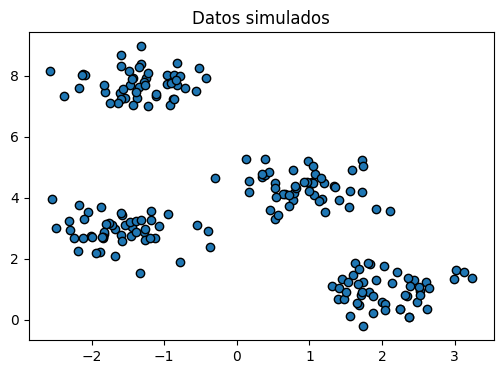

In [3]:
#Obtengamos la gráfica de nuestros datos simulados
fig, ax=plt.subplots(1,figsize=(6,4))       # Cuantas gráficas queremos mostrar y tamaño
ax.scatter(x=X[:,0],          # Coordenada x de los puntos
          y=X[:,1],           # Coordenada y de los puntos
          marker='o',         # Forma de los puntos (observaciones)
          edgecolor='black')  # Color del borde de los puntos
ax.set_title('Datos simulados')

In [4]:
#Escalamos los datos
X_s=scale(X)

Text(0, 0.5, 'Media de Shilouette')

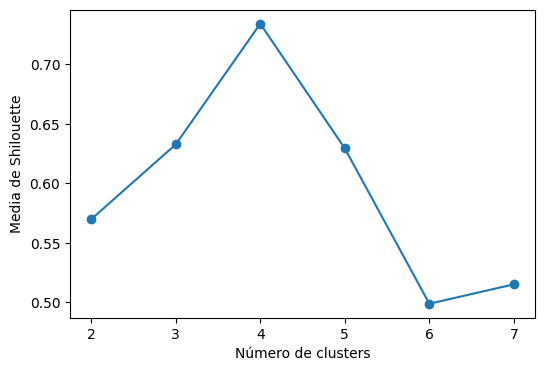

In [5]:
#Paso 1: Selección del número óptimo de cluster.
#Coeficiente de Shilouette
rango = range(2,8) #son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios = []

for n_clusters in rango:
    kmedias = KMeans(n_clusters = n_clusters, random_state = 123) #algorito de k-medias
    etiquetas = kmedias.fit_predict(X)
    valores_m = silhouette_score(X,etiquetas)  #Coeficiente neceseta los datos y los grupos que se generaron.
    valores_medios.append(valores_m)
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(rango,valores_medios, marker = 'o')
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media de Shilouette")

Con el gráfico anterior, podemos decir que el número óptimo de clusters es 4 (el valor máximo del coeficiente de Silhouette se encuentra en 4).

In [6]:
#Ahora realizamos k-medias con k=4
kmedias=KMeans(n_clusters=4)       # Algoritmo de k-medias
kmedias.fit(X_s)                   # Entrenamos el modelo

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [7]:
#Veamos los centros de cada grupo en la última iteración
kmedias.cluster_centers_

# Aquí observamos el punto representativo para cada uno de los grupos

array([[ 0.56133565,  0.14146758],
       [-0.83166191,  1.48652818],
       [-1.00251597, -0.42639505],
       [ 1.27284223, -1.20160071]])

In [8]:
#Etiquetas que asigno a cada elemento
# Asigna una etiqueta a cada observación (Etiqueta 0 es el primer grupo, 1 el segundo, etc.)
kmedias.labels_

array([3, 2, 0, 1, 3, 0, 2, 0, 0, 0, 0, 3, 2, 2, 3, 0, 1, 1, 1, 3, 1, 2,
       3, 2, 3, 3, 1, 3, 3, 0, 1, 0, 2, 3, 2, 0, 2, 0, 0, 1, 1, 1, 1, 0,
       3, 2, 0, 1, 1, 0, 1, 2, 2, 1, 0, 1, 2, 3, 0, 3, 1, 0, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 0, 0, 2, 1, 2, 2, 3, 3, 1, 0, 3, 2, 2, 0, 0, 3,
       2, 2, 1, 1, 1, 0, 0, 3, 2, 1, 0, 0, 1, 3, 3, 1, 1, 2, 0, 3, 3, 0,
       1, 2, 2, 3, 3, 0, 2, 2, 1, 0, 1, 2, 0, 3, 0, 2, 0, 2, 3, 0, 2, 3,
       2, 1, 1, 2, 1, 1, 3, 1, 3, 2, 3, 3, 2, 3, 0, 3, 2, 1, 1, 1, 0, 2,
       3, 0, 1, 2, 1, 3, 1, 3, 3, 2, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1, 1, 1,
       0, 0, 2, 0, 2, 3, 0, 3, 0, 2, 2, 1, 0, 1, 3, 3, 0, 1, 2, 2, 2, 0,
       1, 3], dtype=int32)

In [9]:
# Guardamos las etiquetas que generó el algoritmo
etiquetas = kmedias.fit_predict(X)
# etiquetas = predicho por el modelo
# y = etiquetas reales

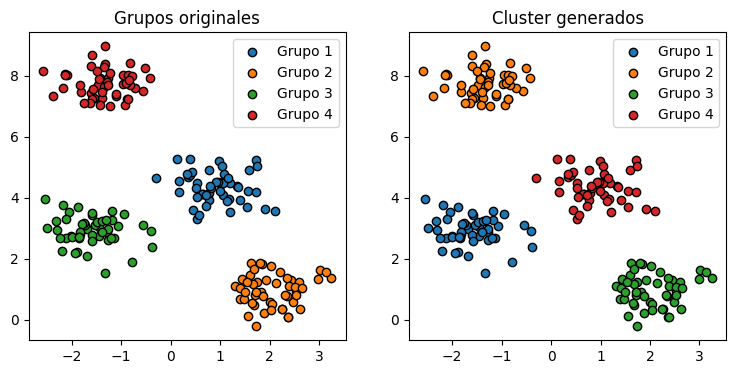

In [10]:
#Vamos a graficar los resultados de k-medias y los vamos a comparar con los originales

# Grupos originales vs clusters generados
fig, ax=plt.subplots(1,2,figsize=(9,4))      # Un renglón de dos columnas

#Grupos originales
for i in np.unique(y):
    ax[0].scatter(
    x=X[y==i,0],
    y=X[y==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[0].set_title('Grupos originales')      # Grafico 0 (ax[0])
ax[0].legend();

#Clusters generados
for i in np.unique(etiquetas):
    ax[1].scatter(
    x=X[etiquetas==i,0],
    y=X[etiquetas==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[1].set_title('Cluster generados')    # Grafico 1 (ax[1])
ax[1].legend();

In [ ]:
# Las tablas cruzadas funcionan para analizar el número correcto de predicciones que hace el modelo vs las etiquetas reales
#Tabla cruzada
pd.crosstab(y,etiquetas,dropna=False,rownames=['grupo_original'], colnames=['cluster'])

cluster,0,1,2,3
grupo_original,,,,
0,0,0,0,50
1,0,0,50,0
2,50,0,0,0
3,0,50,0,0


Este es un buen modelo, ya que los grupos originales son 4 y el algoritmo ha sido capaz de identificarlos correctamente.

In [13]:
#Clasificación de nuevas observaciones
nueva=np.array([[0.56133565,  0.14146758]])
nueva
etiqueta = kmedias.predict(nueva.reshape(1, -1))

In [15]:
print(f"La etiqueta predicha para la nueva observación es: {etiqueta[0]}")

La etiqueta predicha para la nueva observación es: 2


# 2. Iris

In [2]:
# Cargar datos desde un archivo CSV iris1.csv
datos=pd.read_csv("C:/Users/GabDomDal/Desktop/Ejercicios/Analitica de datos/Trabajo 21/iris1.csv")
datos

,Longitud sepalo,Ancho sépalo,Longitud pétalo,Ancho pétalo,Especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
X=np.array(datos[["Longitud sepalo","Ancho sépalo","Longitud pétalo","Ancho pétalo"]])
y=np.array(datos['Especie'])

In [4]:
#Escalamos los datos
X_s=scale(X)

Text(0, 0.5, 'Media de Shilouette')

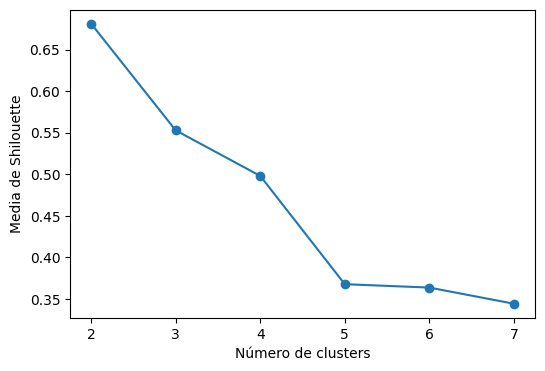

In [5]:
#Paso 1: Selección del número óptimo de cluster.
#Coeficiente de Shilouette
rango=range(2,8) #son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios=[]

for n_clusters in rango:
    kmedias=KMeans(n_clusters=n_clusters, random_state=123) #algorito de k-medias
    etiquetas=kmedias.fit_predict(X)
    valores_m=silhouette_score(X,etiquetas)  #Coeficiente neceseta los datos y los grupos que se generaron.
    valores_medios.append(valores_m)
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax=plt.subplots(1,1,figsize=(6,4))
ax.plot(rango,valores_medios, marker='o')
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Media de Shilouette")

In [6]:
# Ahora realizamos k-medias con k=2
kmedias=KMeans(n_clusters=2)
kmedias.fit(X_s)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [7]:
kmedias.cluster_centers_

array([[ 0.50728948, -0.42663134,  0.65249366,  0.62744675],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349]])

In [8]:
#Clasificación
etiquetas=kmedias.fit_predict(X_s)

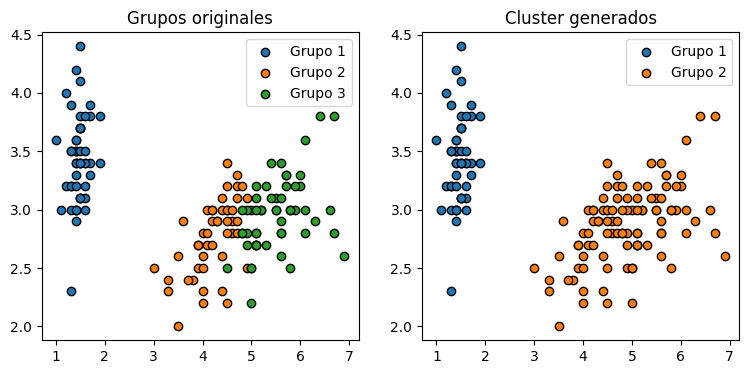

In [9]:
#Vamos a graficar los resultados de k-medias y los vamos a comparar con los originales

# Grupos originales vs clusters generados
fig, ax=plt.subplots(1,2,figsize=(9,4))

#Grupos originales
for i in np.unique(y):
    ax[0].scatter(
    x=X[y==i,2],
    y=X[y==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[0].set_title('Grupos originales')
ax[0].legend();

#Clusters generados
for i in np.unique(etiquetas):
    ax[1].scatter(
    x=X[etiquetas==i,2],
    y=X[etiquetas==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[1].set_title('Cluster generados')
ax[1].legend();

El coeficiente de Shilouette nos dice que el número óptimo de clusters es 2, pero por como está organizada la base de datos, también lo analizaremos con 3 

In [10]:
kmedias=KMeans(n_clusters=3)
kmedias.fit(X_s)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [11]:
#Clasificación
etiquetas=kmedias.fit_predict(X_s)

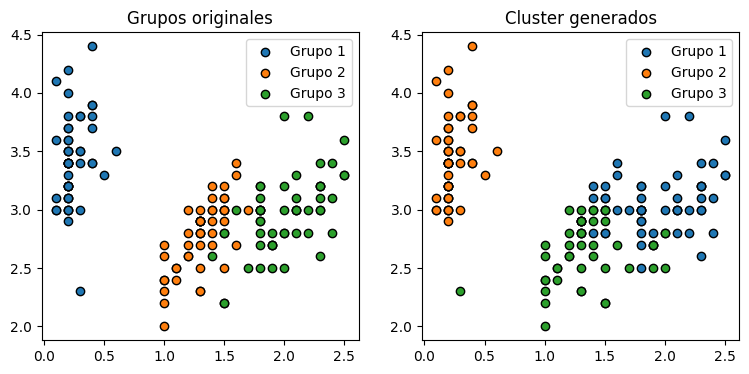

In [12]:
#Vamos a graficar los resultados de k-medias y los vamos a comparar con los originales

# Grupos originales vs clusters generados
fig, ax=plt.subplots(1,2,figsize=(9,4))

#Grupos originales
for i in np.unique(y):
    ax[0].scatter(
    x=X[y==i,3],
    y=X[y==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[0].set_title('Grupos originales')
ax[0].legend();

#Clusters generados
for i in np.unique(etiquetas):
    ax[1].scatter(
    x=X[etiquetas==i,3],
    y=X[etiquetas==i,1],
    c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
    marker='o',
    edgecolor='black',
    label=f"Grupo {i+1}")
ax[1].set_title('Cluster generados')
ax[1].legend();

In [13]:
#Tabla cruzada
pd.crosstab(y,etiquetas,dropna=False,rownames=['grupo_original'], colnames=['cluster'])

cluster,0,1,2
grupo_original,,,
0,0,49,1
1,13,0,37
2,42,0,8


In [14]:
# Tasa de éxito del algoritmo
tasa_exito = kmedias.score(X_s)
tasa_exito

-140.90153181202436

# TAREA: 

Trabajar con la base de datos "comprar_alquilar" y aplicar kmedias sólo con las variables cuantitativas.

En este ejercicio se agruparán los datos de acuerdo a la cantidad de hijos en cada familia.

In [36]:
# Cargar datos desde el archivo CSV comprar_alquilar.csv
data = pd.read_csv("C:/Users/CONTROL/Desktop/Ejercicios/Analitica de datos/Trabajo 21/comprar_alquilar.csv")
data

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [37]:
X = np.array(data.iloc[:,1:6])

# Escalamiento de los datos
X_s = scale(X)

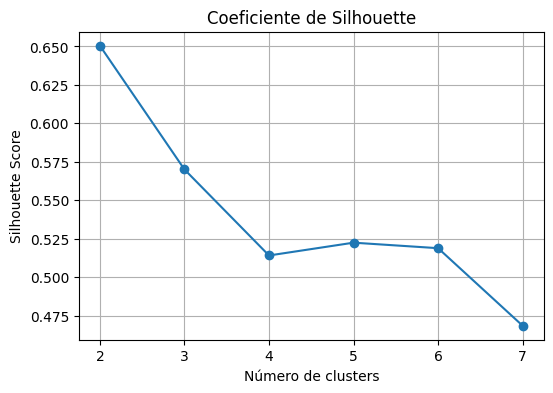

In [39]:
# Paso 1: Selección del número óptimo de cluster.
# Coeficiente de Shilouette
rango = range(2, 8)  # son los valores de clusters que probaremos para elegir donde se encuentre el máximo
valores_medios = []
for n_clusters in rango:
	kmedias = KMeans(n_clusters = n_clusters, random_state = 123, n_init=10) #algorito de k-medias
	etiquetas = kmedias.fit_predict(X)
	valores_m = silhouette_score(X,etiquetas)  #Coeficiente necesita los datos y los grupos que se generaron.
	valores_medios.append(valores_m)
	
#Obtenemos un gráfico donde sea más visible el número óptimo de clusters, en este caso buscamos el valor máximo
fig, ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(rango, valores_medios, marker='o')
ax.set_title("Coeficiente de Silhouette")
ax.set_xlabel("Número de clusters")
ax.set_ylabel("Silhouette Score")
ax.grid()
plt.show()

El número óptimo de clústers según el método de Silhouette es 2. Pero si analizamos los datos, vemos que hay 5 grupos de hijos: 0, 1, 2, 3 y 4. Por lo tanto, se realizará el análisis con 5 clústers.

Ahora, usaremos k-medias con k=5.

In [40]:
# Algoritmo de k-medias con k=5
kmedias = KMeans(n_clusters = 5, n_init=10)
kmedias.fit(X_s)

KMeans(n_clusters=5, n_init=10)

In [30]:
# Centroides de los clústers
kmedias.cluster_centers_

array([[ 3.87568365e-01, -9.68350605e-02, -1.22350290e+00,
         8.03753002e-01,  8.20081499e-01],
       [-4.67922595e-01,  1.27080970e+00,  2.87585873e-01,
        -8.71652990e-01, -6.75270264e-01],
       [ 1.28165628e+00, -2.28481535e-01,  7.06134769e-02,
        -4.98062447e-01, -5.49674229e-01],
       [-9.25731166e-01, -6.11835075e-01, -2.09936568e-05,
        -6.40142207e-01, -6.71685221e-01],
       [ 9.99261702e-02, -2.92462218e-01,  1.04049364e+00,
         1.01565254e+00,  8.78124961e-01]])

In [41]:
# Clasificación
etiquetas = kmedias.fit_predict(X_s)

Ahora, graficamos los centroides de los clústers y la clasificación de las observaciones.

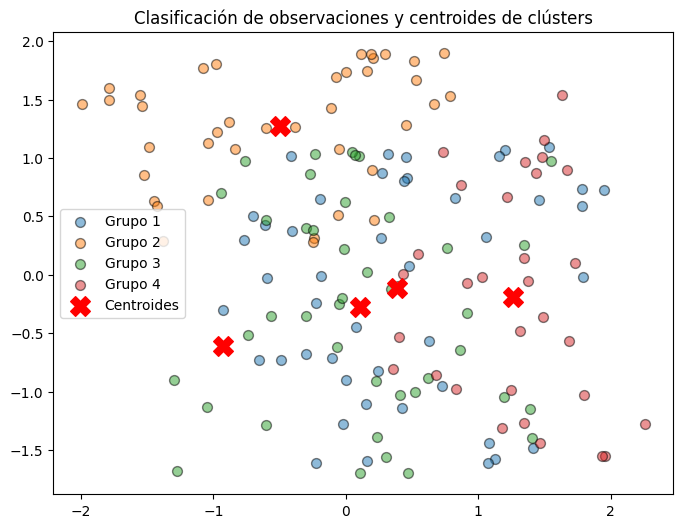

In [32]:
# Graficamos los centroides de los clústers y la clasificación de las observaciones
fig, ax = plt.subplots(1,1,figsize=(8,6))
for i in range(4):
	ax.scatter(X_s[etiquetas==i, 0], X_s[etiquetas==i, 1], 
			   c=plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
			   marker='o', s=50, alpha=0.5, edgecolor='black', label = f"Grupo {i+1}")
ax.scatter(kmedias.cluster_centers_[:, 0], kmedias.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
ax.set_title("Clasificación de observaciones y centroides de clústers")
ax.legend()
plt.show()

In [33]:
# Tabla cruzada
pd.crosstab(data["hijos"], etiquetas, dropna=False, rownames=['Decisión original'], colnames=['Cluster'])

Cluster,0,1,2,3,4
Decisión original,,,,,
0,25,17,15,12,22
1,8,6,8,6,7
2,6,5,9,6,5
3,3,9,6,3,7
4,3,2,4,4,4


In [34]:
# Tasa de éxito del algoritmo
tasa_exito = kmedias.score(X_s)
tasa_exito

-464.1122641614992

Como la tasa de éxito es muy negativa, el modelo no es bueno.